In [5]:
from spot.Spot import Spot
from spot.constants import ROOT_DIR
import os

FUNCTION_DIR = "serverless_functions"
FUNCTION = "aes"
MODEL = "polynomial"

MEM_SIZE = "Memory Size"

path = os.path.join(ROOT_DIR, FUNCTION_DIR, FUNCTION)
spot = Spot(path, MODEL)

spot.ml_model.fetch_data()
df = spot.ml_model._df
df[MEM_SIZE] = df[MEM_SIZE].astype(int)

In [6]:
df.head()

,Runtime,Timeout,Memory Size,Architectures,Region,Cost
0,python3.8,3,128,x86_64,us-east-2,0.000033
1,python3.8,3,128,x86_64,us-east-2,0.00005
2,python3.8,3,128,x86_64,us-east-2,0.000233
3,python3.8,3,128,x86_64,us-east-2,0.000117
4,python3.8,3,128,x86_64,us-east-2,0.000467


array([[<AxesSubplot:title={'center':'Memory Size'}>]], dtype=object)

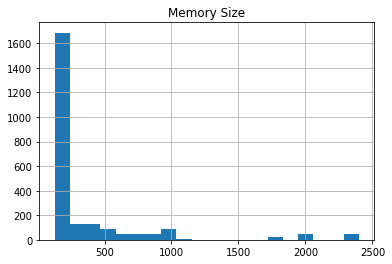

In [7]:
df[df[MEM_SIZE] < 2500].hist(bins=20, column="Memory Size")
# df.dtypes

In [10]:
df[MEM_SIZE].value_counts().sort_index()

128     1554
180       44
200       44
228       44
256       88
300       44
400      132
512       88
600       44
700       44
900       44
1024      88
1100       4
1820      22
2048      44
2400      44
3008      44
3512      22
4096      44
5204      22
6896      22
8192      88
8588      66
Name: Memory Size, dtype: int64

In [15]:
df[[MEM_SIZE, 'Cost']].groupby(MEM_SIZE).mean().sort_values(by='Cost')

,Cost
Memory Size,
400,0.000225
300,0.000250
200,0.000271
228,0.000278
1100,0.000286
180,0.000290
512,0.000292
256,0.000294
600,0.000302


AttributeError: 'NoneType' object has no attribute 'min'

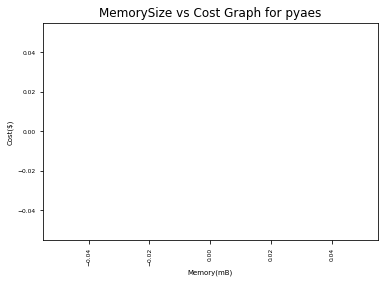

In [8]:
spot.plot_memsize_vs_cost()

In [ ]:
# spot.db.execute_max_value("screenshot-service-dev-capture", "logs", "timestamp")

1648054347030